In [10]:
#encoding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# 直接在python console里面生成图像

In [11]:
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import statsmodels.api as sm
# 一个有很多统计模型的python库

In [12]:
# 导入数据此处仅导入9月份的数据
# .read_csv参数：sep指定间隔符号，header指定某一行为列标题，parse_dates解析某一列作为日期，encoding指定字符集类型
df1 = pd.read_csv('data/user_behaviour_201809_01.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df2 = pd.read_csv('data/user_behaviour_201809_02.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df3 = pd.read_csv('data/user_behaviour_201809_03.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df4 = pd.read_csv('data/user_behaviour_201809_04.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df5 = pd.read_csv('data/user_behaviour_201809_05.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df6 = pd.read_csv('data/user_behaviour_201809_06.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df7 = pd.read_csv('data/user_behaviour_201809_07.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
frames = [df1, df2, df3, df4, df5, df6, df7]
data = pd.concat(frames)
# concat是对几个数据集的拼接

In [13]:
# 数据总览，输出计数，平均值，标准差，最小值，最大值
data.describe()
# data.shape

,日期,使用时长,使用流量,GPS经度,GPS纬度
count,4.229315e+06,4.229315e+06,9.539850e+05,4384.000000,4384.000000
mean,2.018091e+07,5.165055e+02,4.693946e+06,121.412267,31.214000
std,8.153471e+00,4.360917e+03,6.026038e+07,0.167781,0.159696
min,2.018090e+07,1.000000e+00,0.000000e+00,120.429175,30.658342
25%,2.018091e+07,3.000000e+00,2.236500e+04,121.300736,31.135859
50%,2.018091e+07,1.100000e+01,1.508650e+05,121.423319,31.219134
75%,2.018092e+07,6.400000e+01,6.781800e+05,121.507124,31.287088
max,2.018093e+07,1.771110e+06,2.502329e+10,122.020567,31.890294


In [14]:
# 除去‘使用流量’为空的数据
dropnan_data = data[data['使用流量'].notnull()]

In [26]:
# 数据总览
dropnan_data.describe()
# dropnan_data.shape

,日期,使用时长,使用流量,GPS经度,GPS纬度
count,9.539850e+05,9.539850e+05,9.539850e+05,1043.000000,1043.000000
mean,2.018091e+07,1.267356e+03,4.693946e+06,121.430955,31.219767
std,8.140633e+00,7.303263e+03,6.026038e+07,0.165379,0.183321
min,2.018090e+07,1.000000e+00,0.000000e+00,120.530654,30.658342
25%,2.018091e+07,1.600000e+01,2.236500e+04,121.336054,31.108003
50%,2.018091e+07,6.100000e+01,1.508650e+05,121.427291,31.214445
75%,2.018092e+07,3.640000e+02,6.781800e+05,121.522416,31.306453
max,2.018093e+07,1.771110e+06,2.502329e+10,122.020567,31.890294


In [27]:
# 查看前10个数据
data.head(10)

,IMEI,日期,APP名称,使用时间,使用时长,使用流量,GPS经度,GPS纬度,省,市,手机型号,注册省,注册市
0,8633****5756,20180901,搜狗输入法,2018-09-01 00:01:00,4,NaN,NaN,NaN,上海,上海,OPPO R9s,上海,上海
1,8660****9090,20180901,GnssPowerSaver,2018-09-01 00:01:00,5,NaN,NaN,NaN,上海,上海,OPPO A37m,上海,上海
2,A000****6B5D,20180901,塔读文学,2018-09-01 00:00:00,9,NaN,NaN,NaN,上海,上海,HUAWEI TIT-AL00,上海,上海
3,A000****6B5D,20180901,华为应用市场,2018-09-01 00:01:00,2,NaN,NaN,NaN,上海,上海,HUAWEI TIT-AL00,上海,上海
4,A000****6B5D,20180901,搜狐视频,2018-09-01 00:01:00,10,NaN,NaN,NaN,上海,上海,HUAWEI TIT-AL00,上海,上海
5,A100****9464,20180901,手机管家,2018-09-01 00:03:00,2,NaN,NaN,NaN,上海,上海,OPPO R7sm,上海,上海
6,8642****0853,20180901,章鱼输入法,2018-09-01 00:03:00,4,11089.0,NaN,NaN,上海,上海,OPPO R9sk,上海,上海
7,A000****B5DE,20180901,电信营业厅,2018-09-01 00:03:00,2,1756732.0,NaN,NaN,上海,上海,NCE-AL00,上海,上海
8,9900****7669,20180901,系统桌面,2018-09-01 00:04:00,11,NaN,NaN,NaN,上海,上海,Redmi 3,上海,上海
9,A100****1FA9,20180901,任务,2018-09-01 00:00:00,148,NaN,NaN,NaN,上海,上海,HTC M8Sd,上海,上海


In [28]:
def preprocess(cdr,GPS=False):
    if not GPS:
        cdr = cdr.drop('GPS经度',1).drop('GPS纬度',1).drop('省',1).drop('市',1)

        
        cdr = cdr[['IMEI',"日期",'使用时间','使用流量',"APP名称","使用时长"]]
    else:
        cdr = cdr[['IMEI',"日期",'使用时间','使用流量',"APP名称","GPS经度","GPS纬度"]]
        cdr = cdr.rename(columns={"GPS经度": "longitude", "GPS纬度": "latitude"})
    cdr['使用时间'] = pd.to_datetime(cdr['使用时间'])
# to_datetime转换日期时间表达格式
    cdr = cdr.rename(columns={"日期":'date',"使用时间": "ds", "使用流量": "y","APP名称":"APP","使用时长":"time"})
    return cdr

def feature_extraction(traffic,t_index):
# groupby表示对参数标签进行分组
# apply函数会自动遍历每一行DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回
# lambda后面定义自变量为x的函数
# x.resample('1h', on='ds')表示对x的‘ds’以1h为频率重采样
# reindex(t_index)表示对表格以t_index的顺序行重排
    traffic_resampled = traffic.groupby(['IMEI']).apply(lambda x: x.resample('1h', on='ds').sum().reindex(t_index).fillna(0))
    traffic_resampled.reset_index(inplace=True)
    traffic_resampled = traffic_resampled.rename(columns={"level_1": "ds"})
    traffic_resampled = traffic_resampled.set_index(['IMEI', 'ds'])
    traffic_resampled = traffic_resampled.unstack(level=-1)      
    return traffic_resampled

In [29]:
# 这里使用的是没有除去流量为空的数据
cdr = preprocess(data)

In [30]:
cdr.head(5)

,IMEI,date,ds,y,APP,time
0,8633****5756,20180901,2018-09-01 00:01:00,NaN,搜狗输入法,4
1,8660****9090,20180901,2018-09-01 00:01:00,NaN,GnssPowerSaver,5
2,A000****6B5D,20180901,2018-09-01 00:00:00,NaN,塔读文学,9
3,A000****6B5D,20180901,2018-09-01 00:01:00,NaN,华为应用市场,2
4,A000****6B5D,20180901,2018-09-01 00:01:00,NaN,搜狐视频,10


## 全网用户流量使用时域分布统计
### 九月数据

Text(0, 0.5, 'Traffic / B')

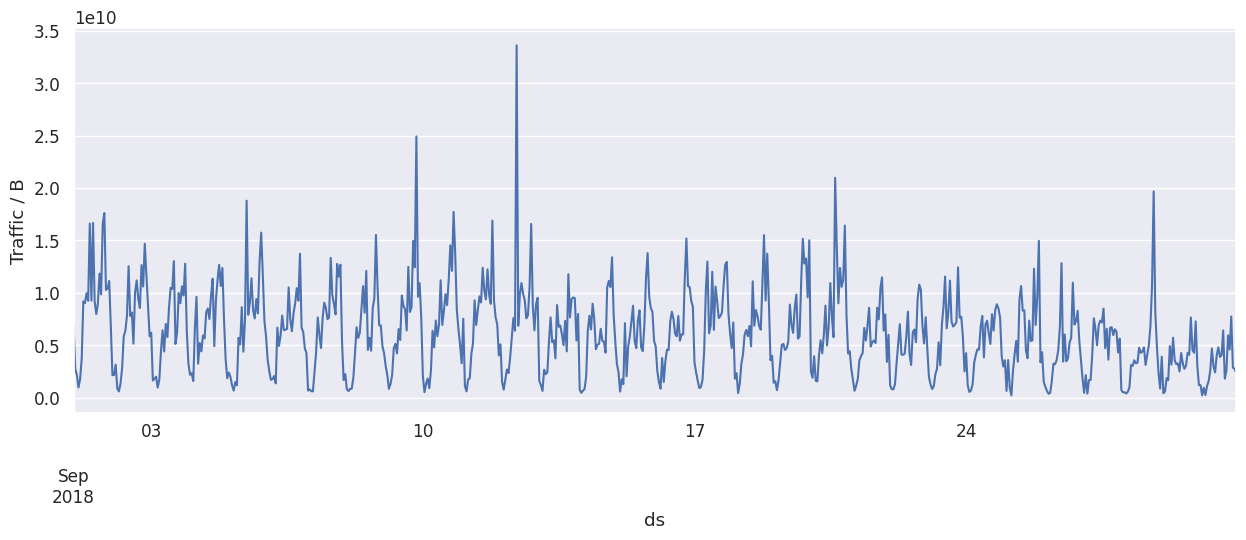

In [31]:
from pylab import mpl
sns.set(font_scale=1.1) 
# 修改字号大小
plt.figure(figsize=(15,5))
# 修改画布大小
sns.set_style("darkgrid")
# 修改表格填充样式
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False
cdr.resample('1H', on='ds').y.sum().plot()
# 以一小时为尺度聚合
plt.ylabel("Traffic / B")

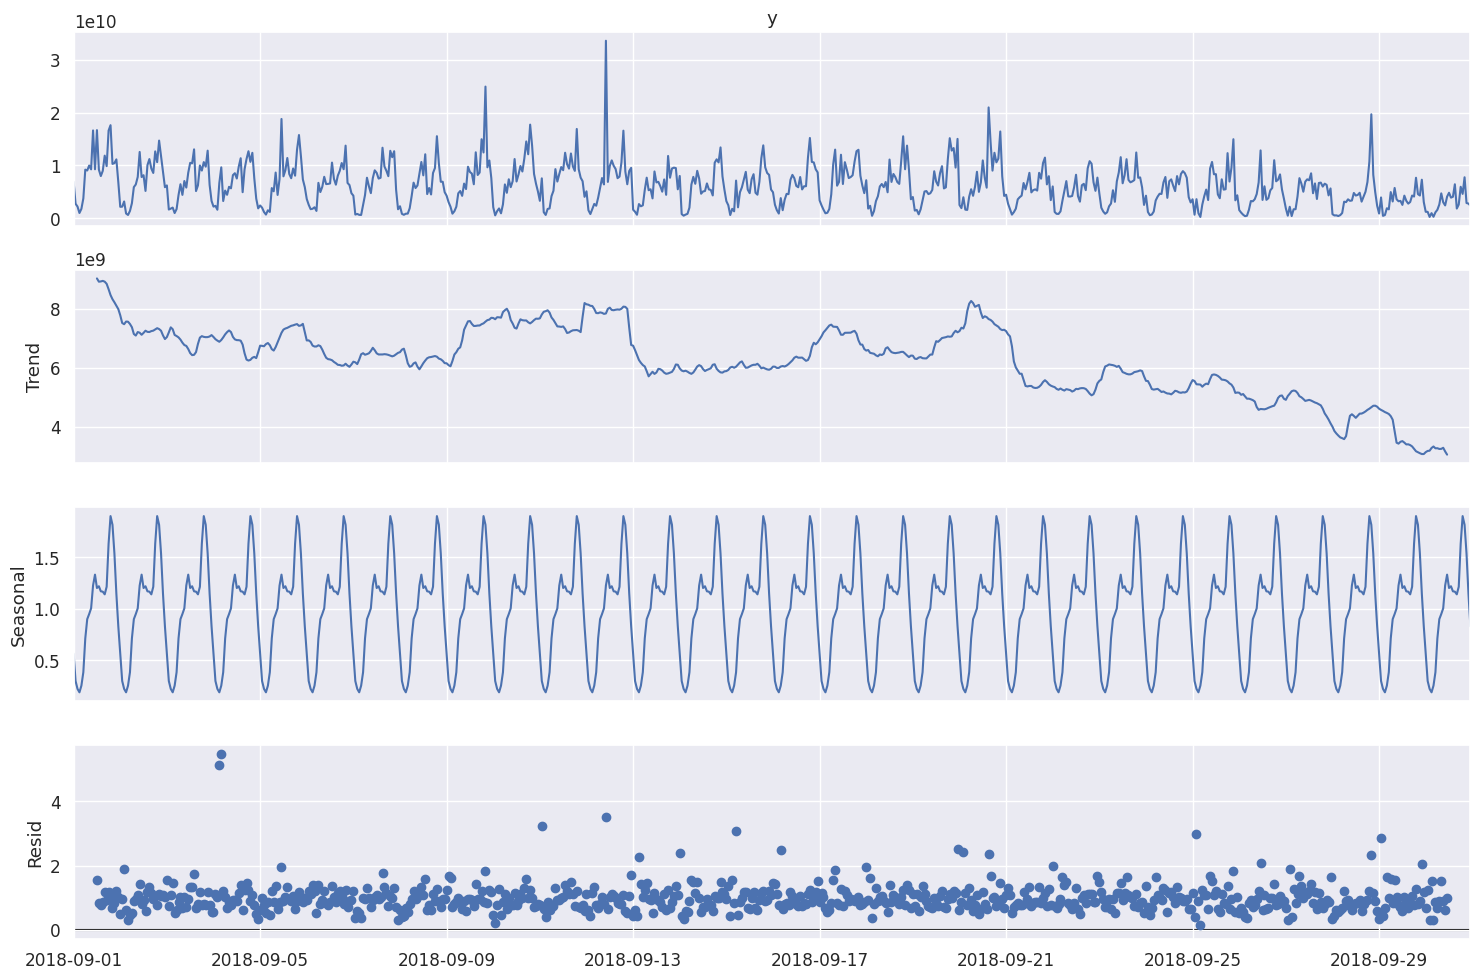

In [33]:
aggerate_sept = cdr.resample('1h', on='ds').y.sum()
# 以一小时为尺度聚合后的数据
res_sept = sm.tsa.seasonal_decompose(aggerate_sept,model='multiplicative')
fig = res_sept.plot()
# 以res_sept数据画图
sns.set(font_scale=1.1)
sns.set_style("darkgrid")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout() 
# 自动调整子图参数,使之填充整个图像区域

plt.show()

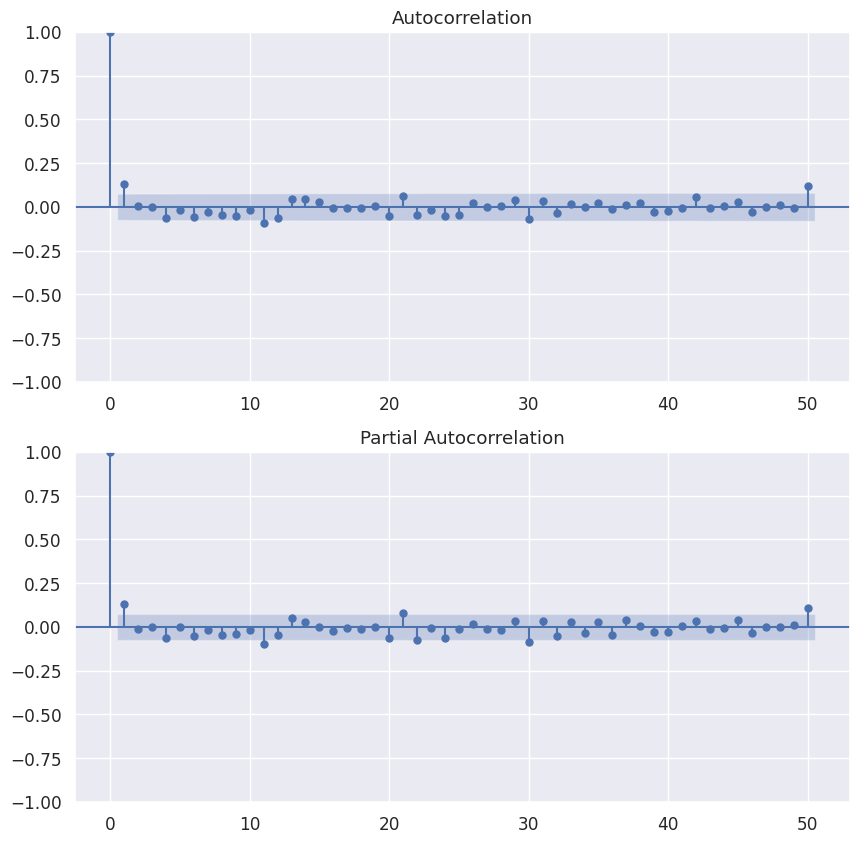

In [34]:
tra = res_sept.resid
# .resid指的是取STR分解后的余项
fig,ax = plt.subplots(2,1,figsize=(10,10))
# 创建2行1列两个图标，大小分别是10*10
fig = sm.graphics.tsa.plot_acf(tra.dropna(), lags=50, ax=ax[0])
# .dropna()表示滤除缺失数据
# 时间序列自相关图，lags表示图中数据的长度，图中灰色部分为alpha为0.05时的置信区间
fig = sm.graphics.tsa.plot_pacf(tra.dropna(), lags=50, ax=ax[1])
# 偏自相关图，lags表示图中数据的长度
plt.show()

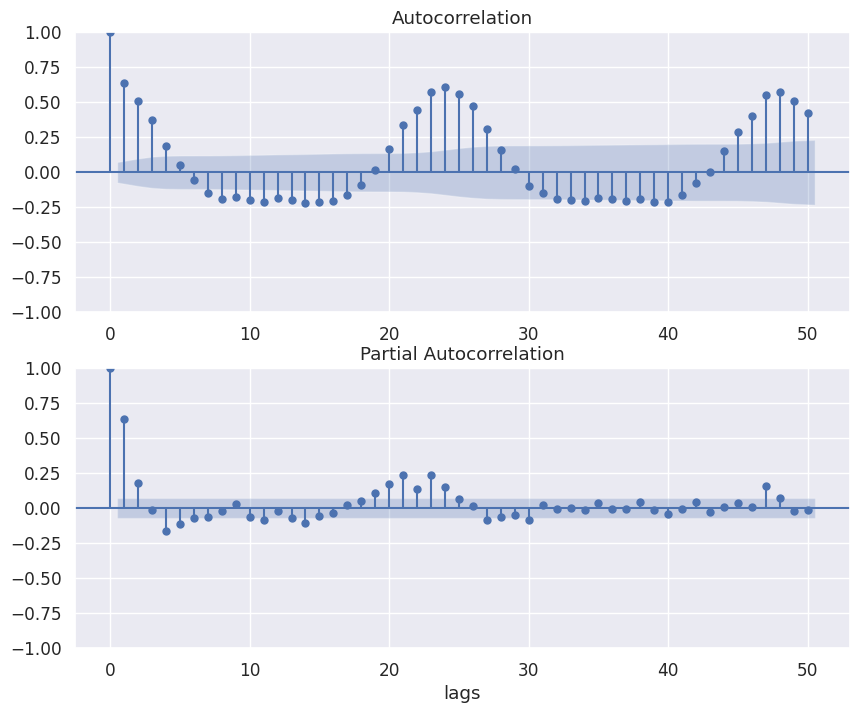

In [35]:
tra = aggerate_sept
# 以一小时为尺度聚合后的数据
fig,ax = plt.subplots(2,1,figsize=(10,8))
# 创建2行1列两个图标，大小分别是10*8
sns.set(font_scale=1.1)
# sns.set_style("whitegrid")
fig = sm.graphics.tsa.plot_acf(tra.dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.dropna(), lags=50, ax=ax[1])
plt.xlabel('lags')
# plt.title('ACF of traffic in September')
plt.show();

### 十月数据

In [36]:
df8 = pd.read_csv('data/user_behaviour_201810_01.csv', sep=',',header=0,parse_dates=["使用时间"],encoding='gb2312')
df9 = pd.read_csv('data/user_behaviour_201810_02.csv', sep=',',header=0,parse_dates=["使用时间"],encoding='gb2312')
frames2 = [df8, df9]
octe = pd.concat(frames2)

In [37]:
cdr_octe = preprocess(octe)
# 解析date的格式
# octe['date'] = pd.to_datetime(octe['date'],format='%Y%m%d')

In [38]:
cdr_octe.head(10)

,IMEI,date,ds,y,APP,time
0,A000****A5CB,20181001,2018-10-01 00:01:00,NaN,华为桌面,6
1,A000****9D93,20181001,2018-10-01 00:03:27,NaN,系统桌面,6
2,A100****2AA6,20181001,2018-10-01 00:02:34,149008.0,更新服务,4
3,A100****2AA6,20181001,2018-10-01 00:02:36,6759.0,美柚,4
4,A100****2AA6,20181001,2018-10-01 00:02:49,NaN,更新服务,2
5,8616****2505,20181001,2018-10-01 00:07:08,NaN,搜狗输入法小米版,7
6,8615****8362,20181001,2018-10-01 00:11:11,NaN,百度输入法华为版,6
7,A000****F1BC,20181001,2018-10-01 00:09:05,NaN,系统桌面,4
8,A000****F1BC,20181001,2018-10-01 00:10:59,NaN,快手,2
9,A000****F1BC,20181001,2018-10-01 00:11:13,NaN,快手,2


Text(0, 0.5, 'Traffic / B')

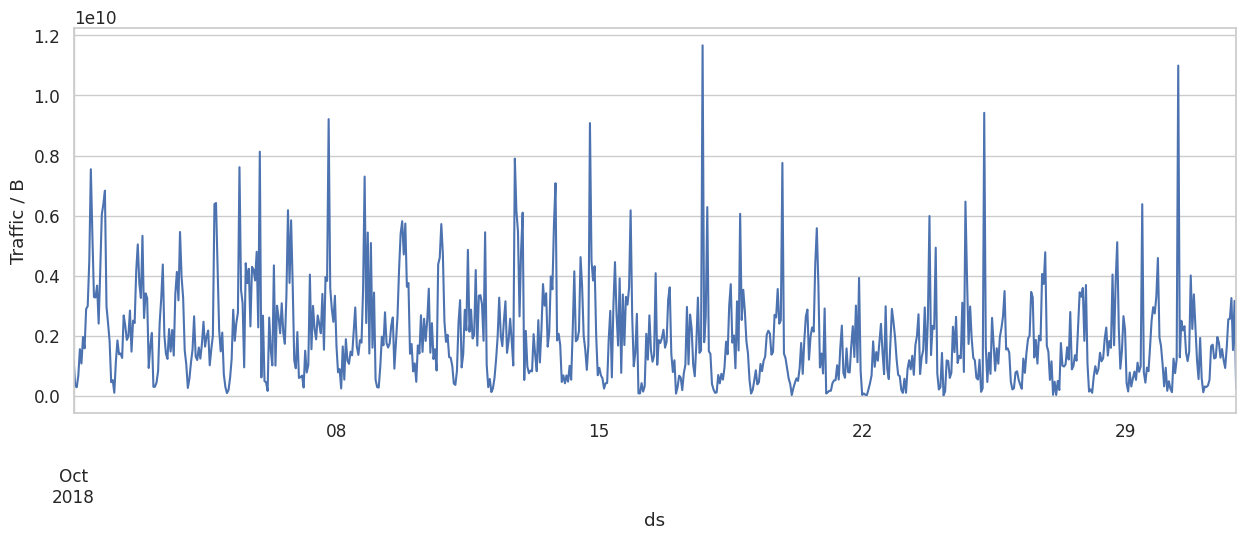

In [39]:
# 统计十月每小时使用流量大小，并做图
sns.set(font_scale=1.1) 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False
cdr_octe.resample('1H', on='ds').y.sum().plot()
plt.ylabel("Traffic / B")

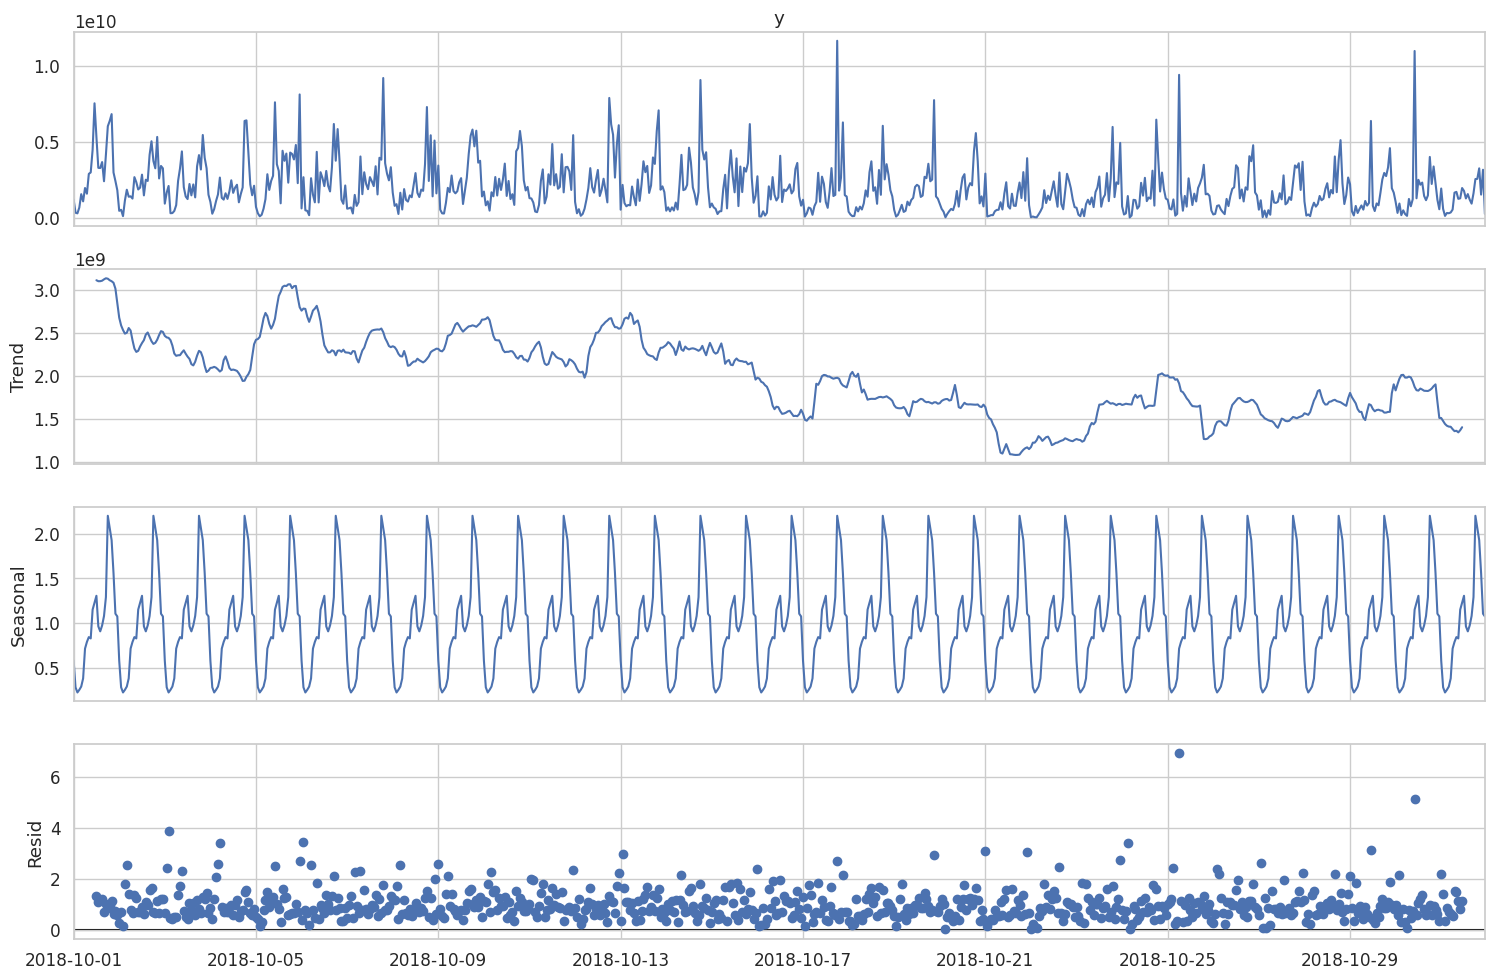

In [40]:
aggerate_octe = cdr_octe.resample('1h', on='ds').y.sum()
# 以一小时为尺度聚合后的数据
res_octe = sm.tsa.seasonal_decompose(aggerate_octe,model='multiplicative')
fig = res_octe.plot()
# 以res_sept数据画图
sns.set(font_scale=1.1)
sns.set_style("darkgrid")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout() 
# 自动调整子图参数,使之填充整个图像区域

plt.show()

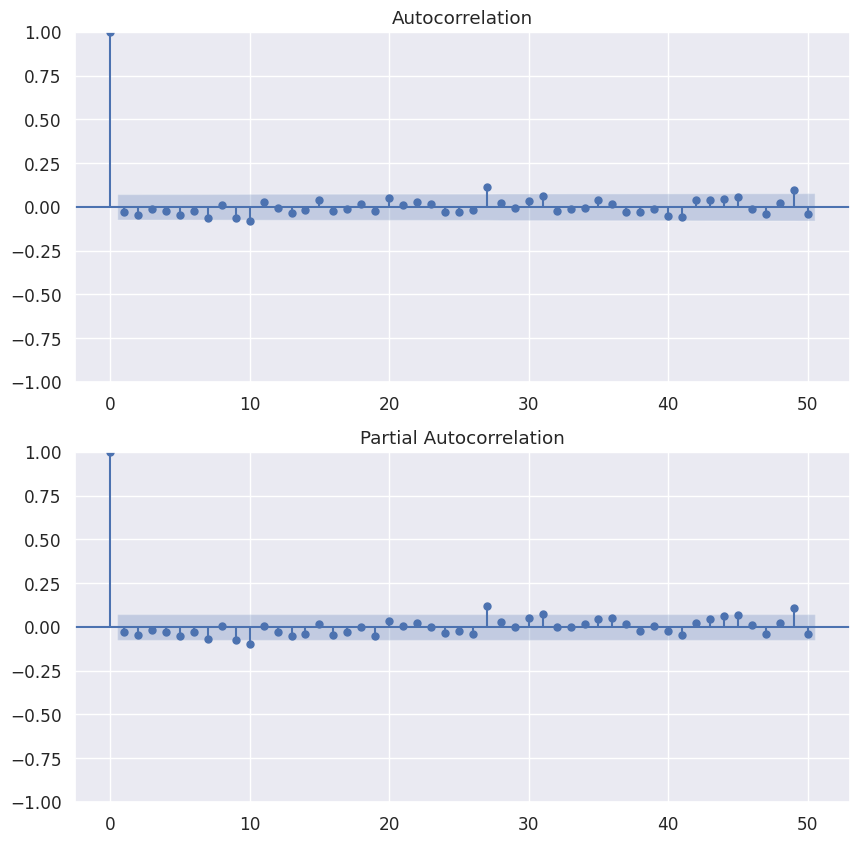

In [41]:
tra_octe = res_octe.resid
# .resid指的是取STR分解后的余项
fig,ax = plt.subplots(2,1,figsize=(10,10))
sns.set_style("whitegrid")
fig = sm.graphics.tsa.plot_acf(tra_octe.dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra_octe.dropna(), lags=50, ax=ax[1])
plt.show()

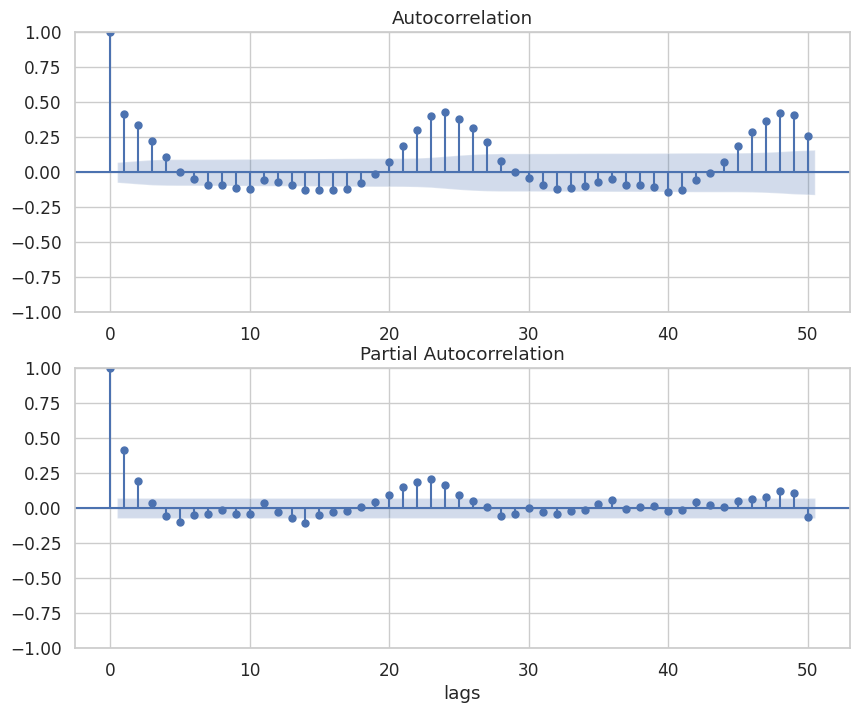

In [42]:
tra_octe = aggerate_octe
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(10,8))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig = sm.graphics.tsa.plot_acf(tra_octe.dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra_octe.dropna(), lags=50, ax=ax[1])
plt.xlabel('lags')
#plt.title('ACF of traffic in October')
plt.show();

Text(0, 0.5, 'number of records')

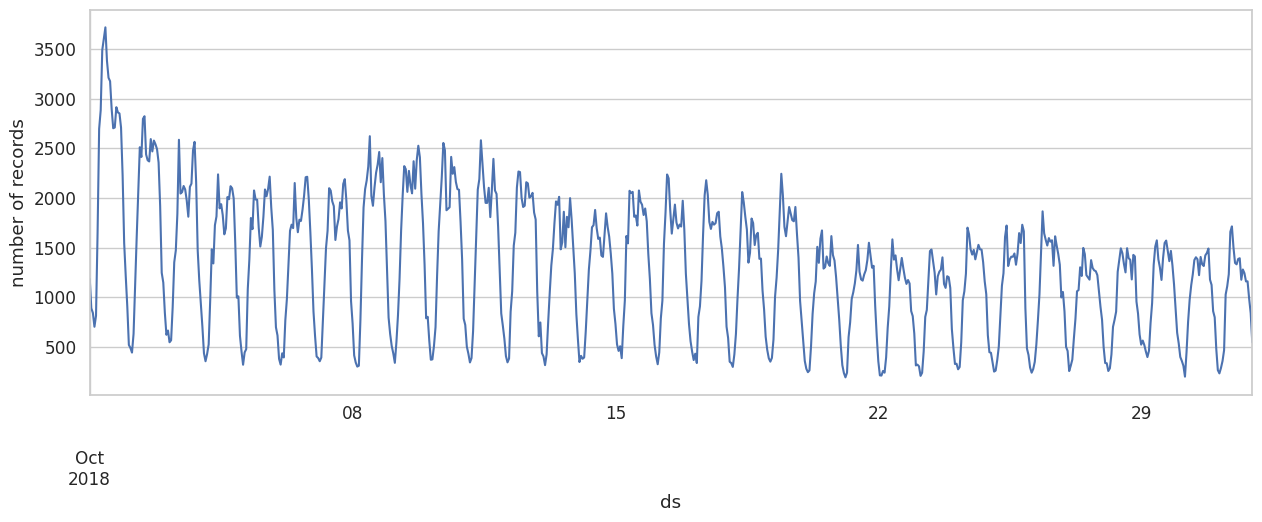

In [43]:
# 统计十月每小时使用次数，并做图
sns.set(font_scale=1.1) 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
cdr_octe.resample('1H', on='ds').time.count().plot()
plt.ylabel("number of records")

Text(0, 0.5, 'usage time / hour')

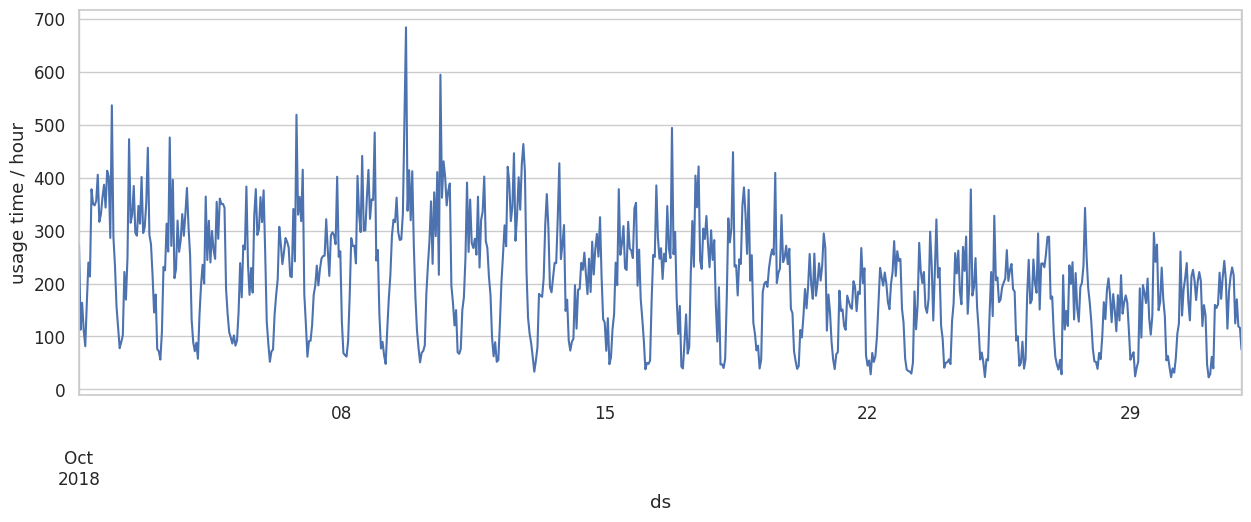

In [44]:
# 统计十月每小时使用流量时长（小时为单位），并做图
sns.set(font_scale=1.1) 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
(cdr_octe.resample('1H', on='ds').time.sum()/60/60).plot()
plt.ylabel("usage time / hour")

## 个人用户流量使用时域分布及统计
### 个人用户相关

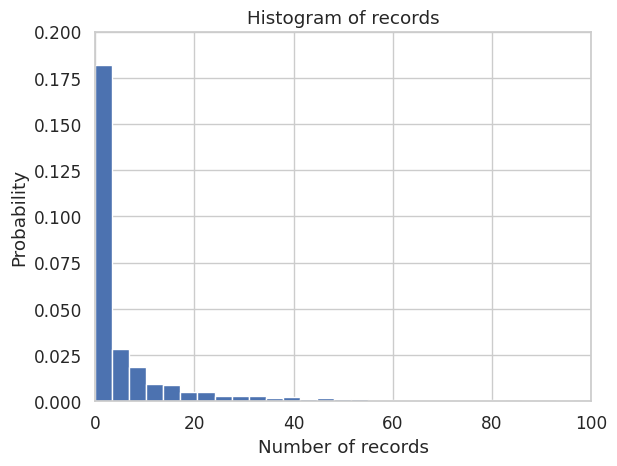

In [45]:
x_count = cdr.groupby(["IMEI"]).y.count().values
# 计算每个用户整个月使用流量的次数，并做图
n, bins, patches = plt.hist(x_count,500, density=True)
# 这里bins设置为500即将数值区间分为500份统计每个区间上的数据个数
plt.xlabel('Number of records')
plt.ylabel('Probability')
plt.title('Histogram of records')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0, 100, 0, 0.2])
# 设置横纵坐标显示范围
# plt.grid(True)
plt.show()

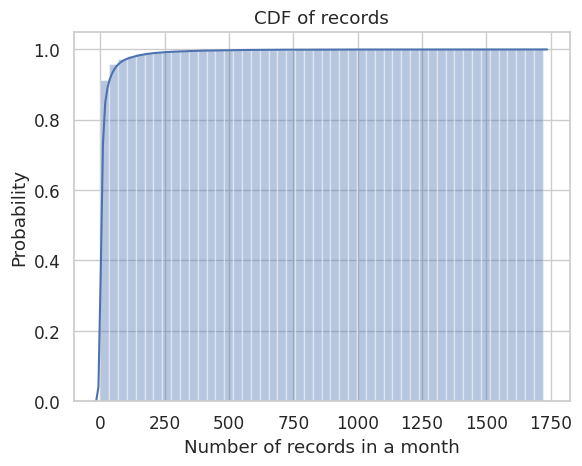

In [46]:
ax = sns.distplot(x_count,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
#plt.xscale('log')
#plt.axis([1, 1000, 0, 1])
plt.xlabel('Number of records in a month')
plt.ylabel('Probability')
plt.title(r'CDF of records')
plt.show()

In [47]:
# 计算每个用户整个月中每日使用流量的平均流量
traffic = cdr[['IMEI','date','y']]
traffic['date'] = pd.to_datetime(traffic['date'],format='%Y%m%d')
# traffic['weekday'] = traffic.date.dt.dayofweek
traffic = traffic.groupby(['IMEI','date']).sum()
traffic = traffic.groupby(['IMEI']).mean()
traffic = traffic[traffic['y']!=0] 
traffic = np.log10(traffic)
# 对数据进行对数运算

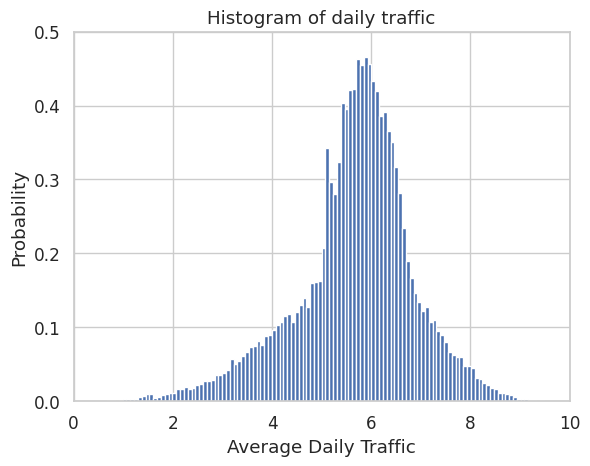

In [48]:
# 对每个用户整个月使用流量的平均流量做图
x = traffic.y.values
n, bins, patches = plt.hist(x,120, density=True)
plt.xlabel('Average Daily Traffic')
plt.ylabel('Probability')
plt.title('Histogram of daily traffic')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0, 10, 0, 0.5])
# plt.grid(True)
plt.show()

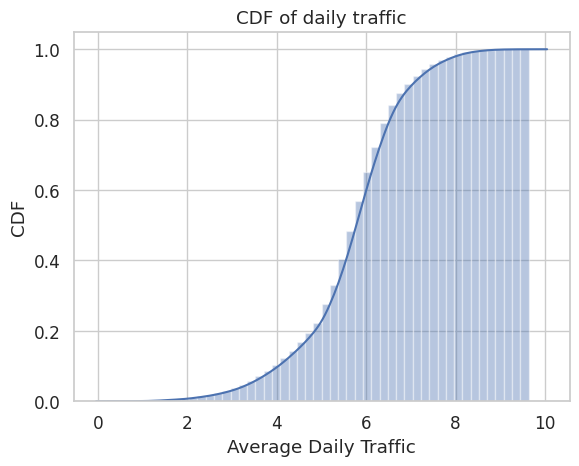

In [49]:
# 对每个用户整个月使用流量的平均流量做CDF图
x = traffic.y.values
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
# distplot是直方图和核密度曲线绘制函数
# hist_kws表示以字典形式传入直方图的参数，kde_kws表示以字典的形式传入核密度曲线的参数
# cumulative表示是否累计数据
plt.xlabel('Average Daily Traffic')
plt.ylabel('CDF')
plt.title('CDF of daily traffic')
plt.show()

### APP相关

In [50]:
usage_time = cdr[['IMEI','time','date']]
# 取出九月与处理过后数据中的'IMEI','time','date'三列
usage_time['date'] = pd.to_datetime(usage_time['date'],format='%Y%m%d')
# 调整'date'列的数据格式
usage_time = usage_time[usage_time['time']<=86400]
usage_time = usage_time.groupby(['IMEI','date']).sum()
# 计算每个用户每天的使用应用总时长（秒）
mean_usage_time = usage_time.groupby(['IMEI']).mean()
# 计算每个用户每天的使用应用平均时长（秒）
mean_usage_time = mean_usage_time[mean_usage_time['time']!=0]
# 去除空数据
mean_usage_time = mean_usage_time/60/60
# 计算每个用户每天的使用应用平均时长（小时）

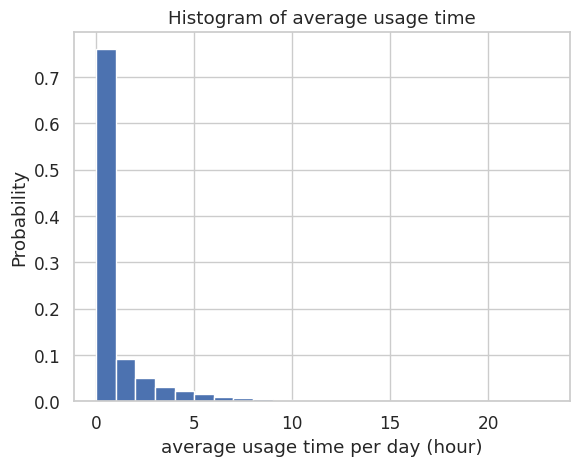

In [51]:
# 用户每日使用应用时长直方图
n,bins,patches = plt.hist(mean_usage_time.values,bins=range(0,24,1),density=True)
# hist（）是创建直方图的函数，其中参数bins为箱子的个数,也就是总共有几条条状图
# range(0,24,1)表示从0到24间隔为1共25条，density表示是否进行归一化
#plt.ylim([0,5000])
plt.xlabel('average usage time per day (hour)')
plt.ylabel('Probability')
plt.title(r'Histogram of average usage time')
plt.show()

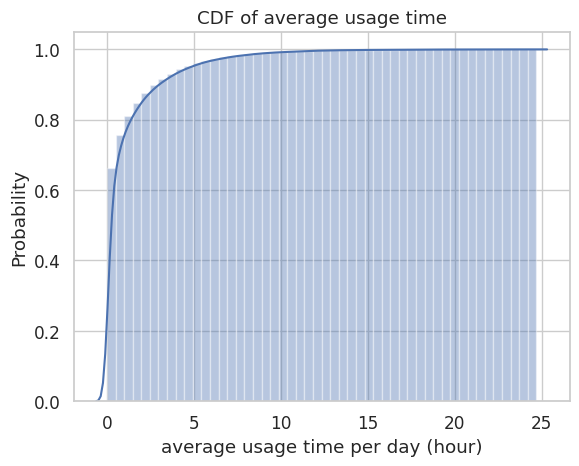

In [52]:
# 用户每日使用应用时长CDF图
x = mean_usage_time.values
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
# distplot是直方图和核密度曲线绘制函数
# hist_kws表示以字典形式传入直方图的参数，kde_kws表示以字典的形式传入核密度曲线的参数
# cumulative表示是否累计数据
plt.xlabel('average usage time per day (hour)')
plt.ylabel('Probability')
plt.title(r'CDF of average usage time')
plt.show()

In [53]:
app = cdr[['IMEI','APP','date','y']]
app['date'] = pd.to_datetime(app['date'],format='%Y%m%d')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

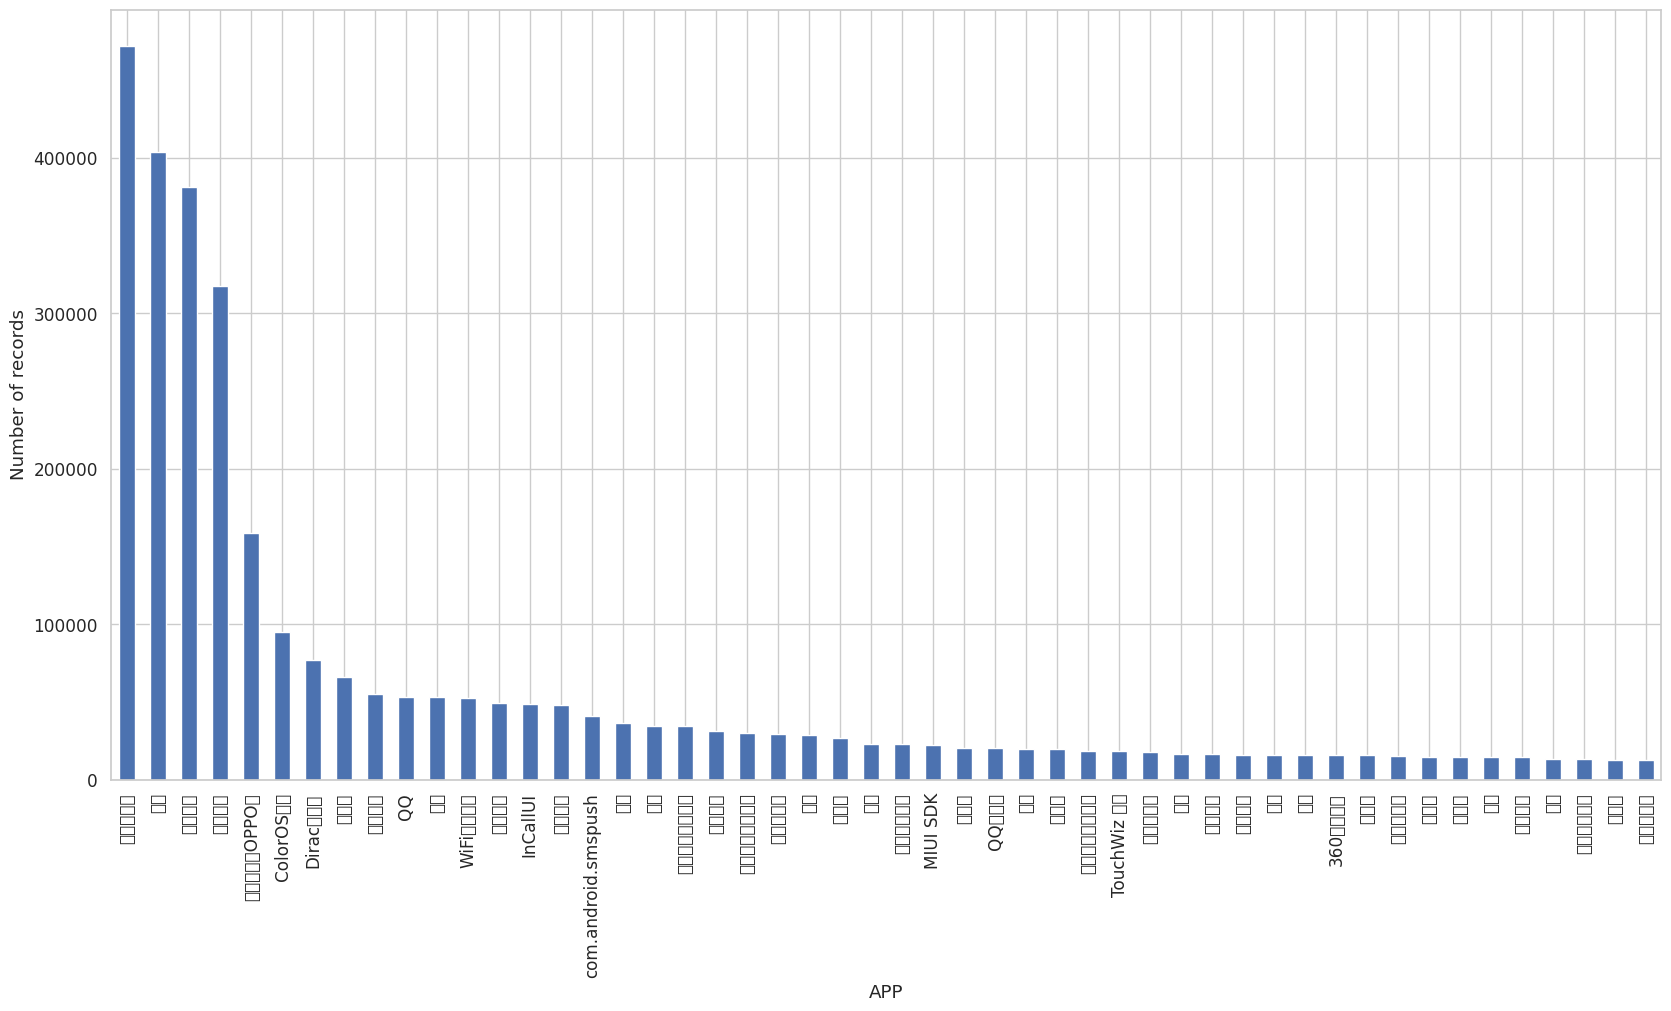

In [54]:
# 9月使用次数最多的50个手机应用软件
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  
# 解决保存图像是负号'-'显示为方块的问题
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.edgecolor'] = 'white'
# plt.rcParams['grid.alpha'] = 1
# plt.rcParams['grid.color'] = "#cccccc"


plt.figure(figsize=(20,10))
# sns.set(rc={'figure.figsize':(15,8.27)})
plt.rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# sns.set_context("poster")

app.groupby(['APP']).count().sort_values('IMEI',ascending=False).IMEI.iloc[0:50].plot.bar();
plt.ylabel('Number of records')
plt.grid(True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


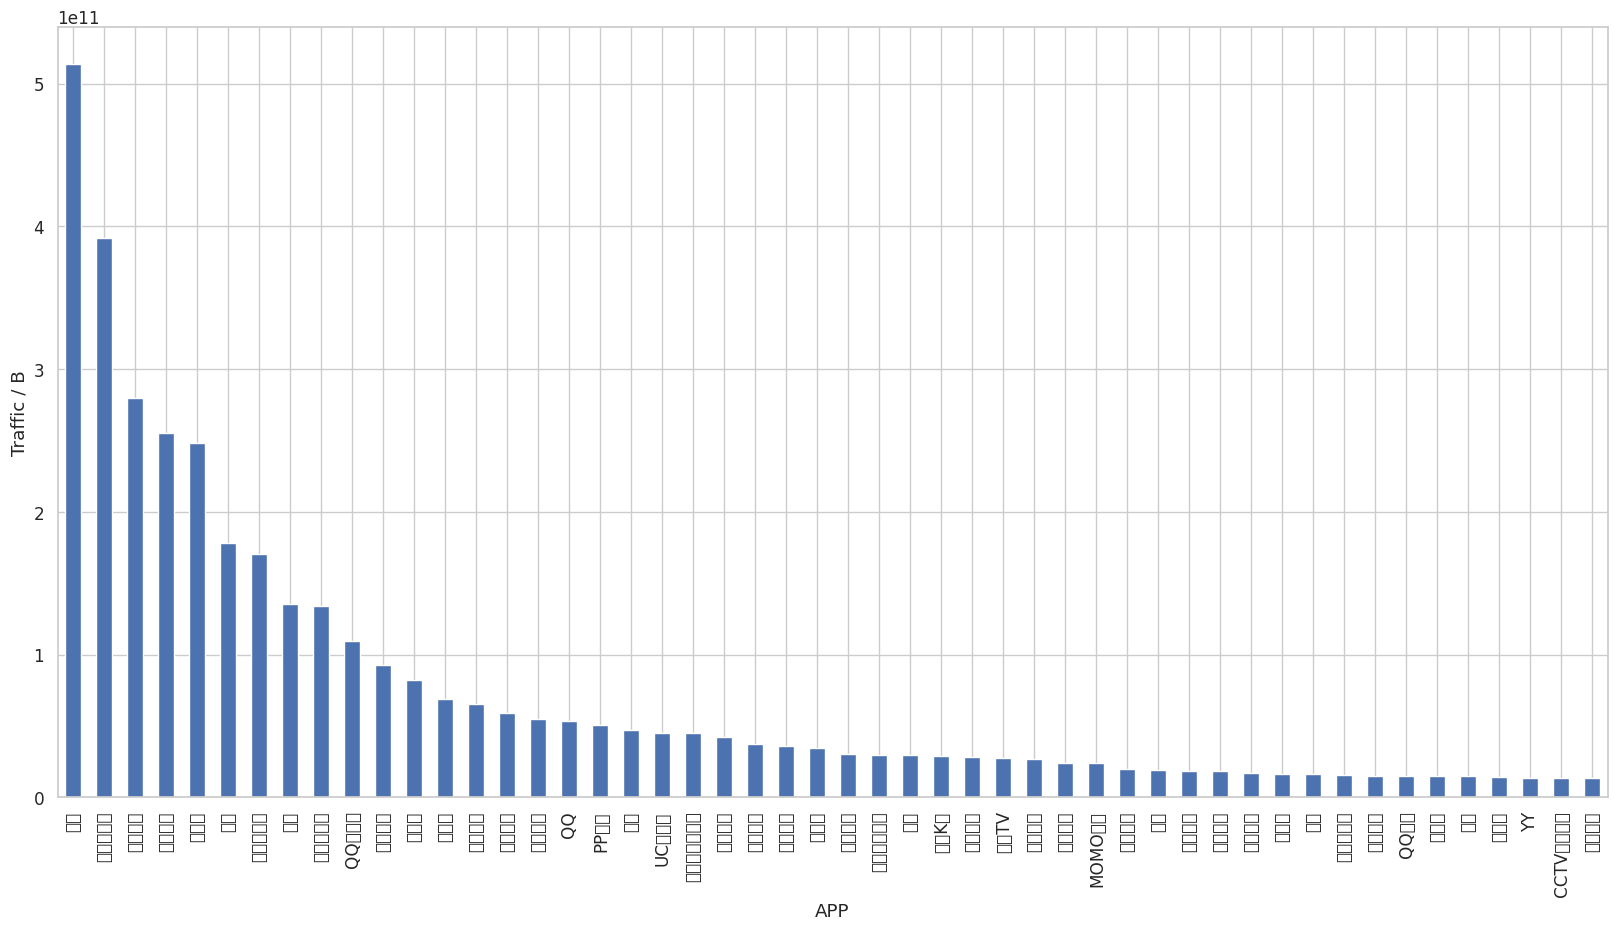

In [55]:
# 9月使用流量最多的50个手机应用软件
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  
# 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 15})
app.groupby(['APP']).y.sum().sort_values(ascending=False).iloc[0:50].plot.bar();
plt.ylabel('Traffic / B')
plt.grid(True)

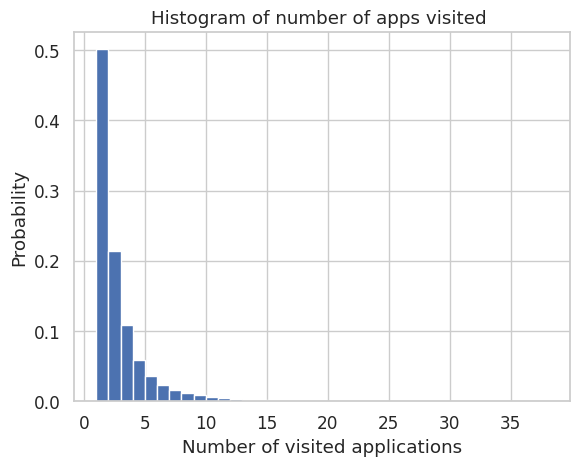

In [56]:
app_count = app.groupby(['IMEI','date']).nunique()
# app = app.drop('date',1)
app_count_mean = app_count.groupby(['IMEI']).mean()
x = app_count_mean.APP.values
sns.set(font_scale=1.1) 
sns.set_style("whitegrid")
n,bins,patches = plt.hist(x,bins=range(1,39),density=True)
#plt.ylim([0,5000])
plt.xlabel('Number of visited applications')
plt.ylabel('Probability')
plt.title(r'Histogram of number of apps visited ')
plt.show()

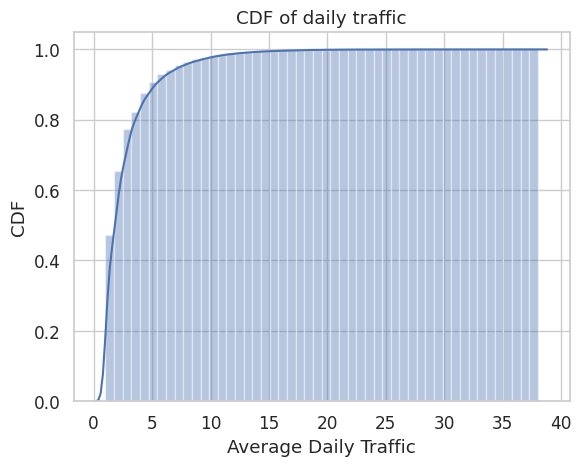

In [57]:
x = app_count_mean.APP.values
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
# distplot是直方图和核密度曲线绘制函数
# hist_kws表示以字典形式传入直方图的参数，kde_kws表示以字典的形式传入核密度曲线的参数
# cumulative表示是否累计数据
plt.xlabel('Average Daily Traffic')
plt.ylabel('CDF')
plt.title('CDF of daily traffic')
plt.show()

### 用户移动性(十月数据)

In [58]:
gps = octe[octe['GPS经度'].notnull()]
gps = preprocess(gps,True)
# 提取出带有经纬度的数据存到gps中
locations = gps.groupby(['IMEI','date']).longitude.nunique().groupby(['IMEI']).mean()
# 计算每个用户10月份每天GPS移动次数的平均值

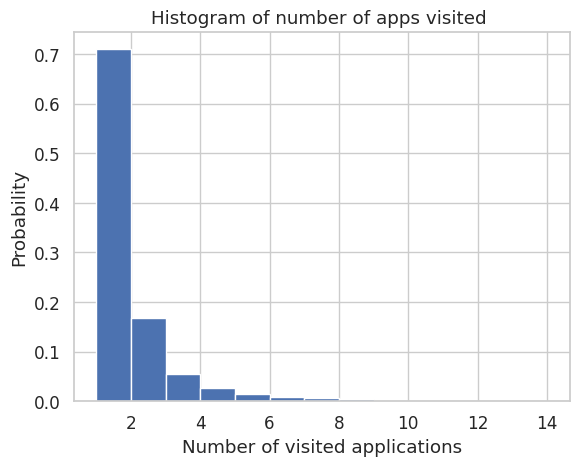

In [59]:
# 用户10月份每天GPS移动次数的平均值的直方图
x = locations.values
sns.set(font_scale=1.1) 
sns.set_style("whitegrid")
n,bins,patches = plt.hist(x,bins=range(1,15),density=True)
#plt.ylim([0,5000])
plt.xlabel('Number of visited applications')
plt.ylabel('Probability')
plt.title(r'Histogram of number of apps visited ')
plt.show()

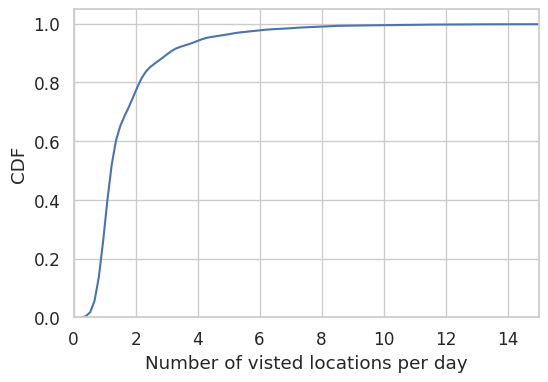

In [60]:
# 用户10月份每天GPS移动次数的平均值的CDF图
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.1) 
sns.set_style("whitegrid")
x = locations
sns.distplot(x,
             hist=False,
             #hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.xlim(xmin=0,xmax=15)
plt.xlabel('Number of visted locations per day')
plt.ylabel('CDF');

In [61]:
np.percentile(locations.values,80)
# 查看80分位数，即把数据集8，2开

2.0

In [62]:
locations = pd.DataFrame(locations)
# 创建数据表格，低移动性用户low、高移动性用户high
low = locations[locations.longitude<2]
high = locations[locations.longitude>=2]

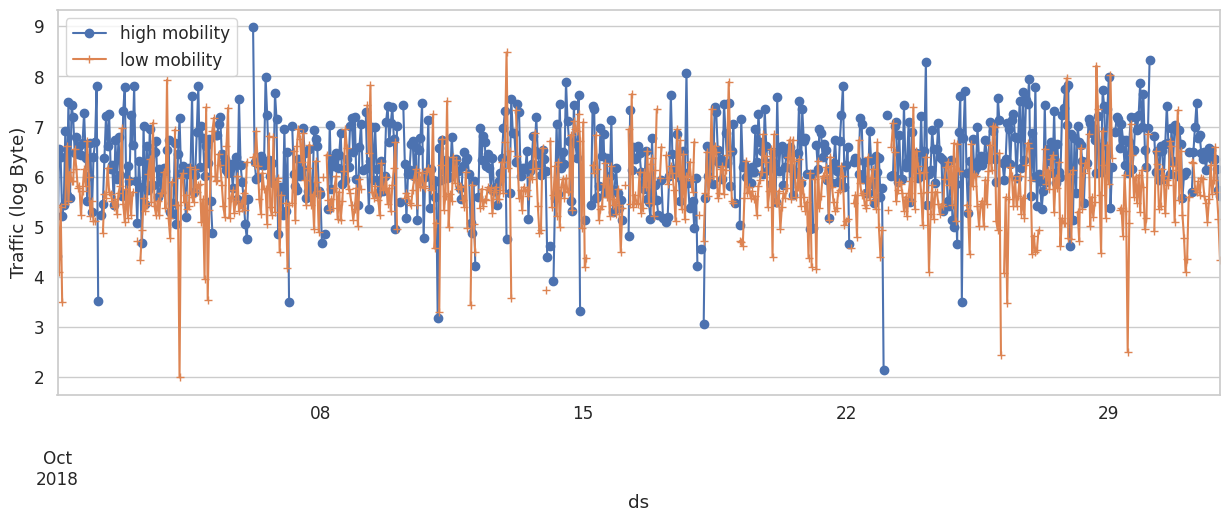

In [63]:
sns.set(font_scale=1.1) 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
np.log10(high.merge(gps,on='IMEI').resample('1H', on='ds').y.mean()).plot(label='high mobility',marker="o");
# .merge()表示将两个数据表合二为一，on表示合并的关键词
np.log10(low.merge(gps,on='IMEI').resample('1H', on='ds').y.mean()).plot(label='low mobility',marker="+");
plt.ylabel('Traffic (log Byte)')
plt.legend();

In [64]:
# 计算低移动性用户每日使用APP数量的平均值
cdr_low = low.merge(gps,on='IMEI')
app_low = cdr_low[['IMEI','APP','date']]
app_low['date'] = pd.to_datetime(app_low['date'],format='%Y%m%d')
app_low = app_low.groupby(['IMEI','date']).nunique()
# 计算低移动性用户每日使用APP数量
# app = app.drop('date',1)
app_low_mean = app_low.groupby(['IMEI']).mean()
# 计算低移动性用户每日使用APP数量的平均值

In [65]:
cdr_high = high.merge(gps,on='IMEI')
app_high = cdr_high[['IMEI','APP','date']]
app_high['date'] = pd.to_datetime(app_high['date'],format='%Y%m%d')
app_high = app_high.groupby(['IMEI','date']).nunique()
# app = app.drop('IMEI',1).drop('date',1)
app_high_mean = app_high.groupby(['IMEI']).mean()
# 计算高移动性用户每日使用APP数量的平均值

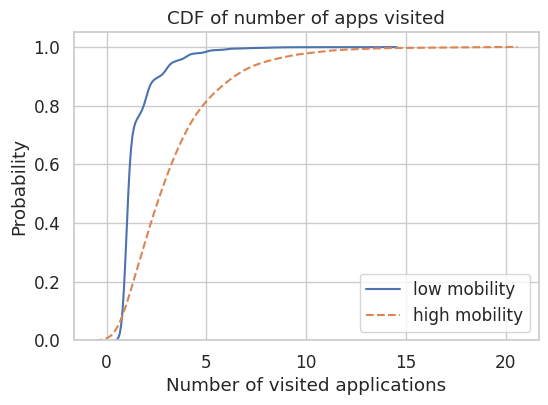

In [66]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.1) 
x = app_low_mean.values
sns.set_style("whitegrid")
sns.distplot(x,
           #  hist_kws=dict(cumulative=True),
             hist=False,
             kde_kws=dict(cumulative=True,linestyle="-"),label="low mobility")
sns.distplot(app_high_mean.values,
             hist=False,
           #  hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True,linestyle="--"),label="high mobility")
plt.xlabel('Number of visited applications')
plt.ylabel('Probability')
plt.title(r'CDF of number of apps visited')
plt.legend()
plt.show()

In [67]:
traffic_high = cdr_high[['IMEI','date','y']]
traffic_high['date'] = pd.to_datetime(traffic_high['date'],format='%Y%m%d')
traffic_high = traffic_high.groupby(['IMEI','date']).sum()
traffic_high = traffic_high.groupby(['IMEI']).mean()
# 计算高移动性用户每日是用流量的平均值
traffic_high = traffic_high[traffic_high['y']!=0] 
traffic_high = np.log10(traffic_high)

In [68]:
traffic_low = cdr_low[['IMEI','date','y']]
traffic_low['date'] = pd.to_datetime(traffic_low['date'],format='%Y%m%d')
traffic_low = traffic_low.groupby(['IMEI','date']).sum()
traffic_low = traffic_low.groupby(['IMEI']).mean()
traffic_low = traffic_low[traffic_low['y']!=0] 
traffic_low = np.log10(traffic_low)

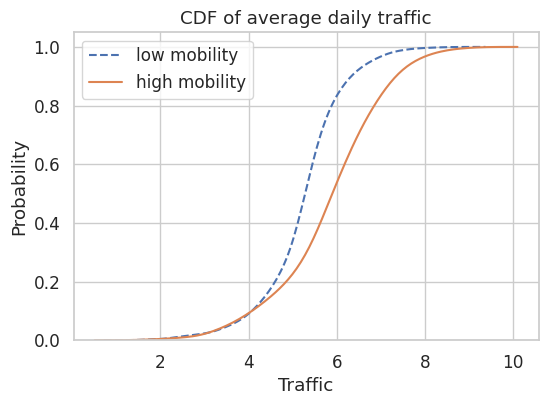

In [69]:
sns.set(font_scale=1.1) 
plt.figure(figsize=(6,4))
x1 = traffic_low.values 
x2 = traffic_high.values
sns.set_style("whitegrid")
sns.distplot(x1,
           #  hist_kws=dict(cumulative=True),
             hist=False,
             kde_kws=dict(cumulative=True,linestyle="--"),label="low mobility")
sns.distplot(x2,
             hist=False,
           #  hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True,linestyle="-"),label="high mobility")
plt.xlabel('Traffic')
plt.ylabel('Probability')
plt.title(r'CDF of average daily traffic')
plt.legend()
plt.show()

### 数据结构检查模块

In [70]:
gps.head(10)

,IMEI,date,ds,y,APP,longitude,latitude
93,8630****2591,20181001,2018-10-01 00:41:21,NaN,搜狗输入法OPPO版,121.388423,31.199852
94,8630****2591,20181001,2018-10-01 00:41:44,NaN,Dirac控制台,121.399940,31.214034
95,8630****2591,20181001,2018-10-01 00:50:46,NaN,DeliverServer,121.424178,31.225074
96,8630****2591,20181001,2018-10-01 01:02:43,NaN,Dirac控制台,121.425529,31.235411
97,8630****2591,20181001,2018-10-01 01:04:15,NaN,搜狗输入法OPPO版,121.425529,31.235411
98,8630****2591,20181001,2018-10-01 01:04:26,NaN,Dirac控制台,121.450422,31.344320
99,8630****2591,20181001,2018-10-01 01:48:49,NaN,搜狗输入法OPPO版,121.450422,31.344320
103,8622****5597,20181001,2018-10-01 02:03:13,NaN,更新服务,121.560136,31.078008
104,8622****5597,20181001,2018-10-01 02:03:37,NaN,网络位置,121.560136,31.078008
135,H180****6039,20181001,2018-10-01 00:46:54,NaN,电信营业厅,121.439953,30.915330


In [71]:
low.head(10)

,longitude
IMEI,
0000****0000,1.428571
0000****9801,1.000000
0010****4895,1.000000
0010****7761,1.000000
0020****9100,1.000000
3518****0159,1.000000
3518****0799,1.000000
3518****1127,1.500000
3518****2509,1.000000


In [72]:
high.count()

longitude    1938
dtype: int64

In [73]:
cdr_low.head(10)

,IMEI,longitude_x,date,ds,y,APP,longitude_y,latitude
0,0000****0000,1.428571,20181007,2018-10-07 09:54:43,NaN,电子邮件,121.427890,31.152755
1,0000****0000,1.428571,20181007,2018-10-07 09:54:45,NaN,华为桌面,121.427890,31.152755
2,0000****0000,1.428571,20181007,2018-10-07 09:55:09,NaN,百度,121.427890,31.152755
3,0000****0000,1.428571,20181007,2018-10-07 09:54:49,403080.0,支付宝,121.427890,31.152755
4,0000****0000,1.428571,20181007,2018-10-07 09:55:29,NaN,华为桌面,121.427890,31.152755
5,0000****0000,1.428571,20181009,2018-10-09 09:29:26,NaN,MIUI SDK,121.510631,31.254114
6,0000****0000,1.428571,20181009,2018-10-09 20:11:22,NaN,软件包安装程序,121.508486,31.339074
7,0000****0000,1.428571,20181010,2018-10-10 18:12:23,NaN,MIUI SDK,121.508496,31.339014
8,0000****0000,1.428571,20181015,2018-10-15 20:47:21,133913.0,电信营业厅,121.519013,31.208199
9,0000****0000,1.428571,20181017,2018-10-17 16:39:10,NaN,WiFi万能钥匙,121.327860,30.731248


In [74]:
app_low.head(10)

APP
IMEI         date           
0000****0000 2018-10-07    4
             2018-10-09    2
             2018-10-10    1
             2018-10-15    1
             2018-10-17    1
             2018-10-20    7
             2018-10-21    5
0000****9801 2018-10-01    1
0010****4895 2018-10-26    1
0010****7761 2018-10-11    1

In [75]:
app_high.head(10)

APP
IMEI         date           
3503****0000 2018-10-26    1
3515****5896 2018-10-30    4
3518****2729 2018-10-03    1
             2018-10-04    1
             2018-10-08    1
             2018-10-09    1
             2018-10-10    1
             2018-10-14    1
             2018-10-16    1
             2018-10-19    1